# Introduction


pada project ini saya akan menampilkan Exploratory Data Analysis (EDA) pada dataset telco custumer churn 

lankah-langkahnya:

- Duplicated value check
- Missing value check
- Statistical summaries of columns
- Univariate analysis
- Bivariate analysis
- Overall summary/EDA findings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()
#menampilkan 5 data teratas dari data frame

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- data terdiri dari 21 kolom dengan 7043 baris
- semua data disetiap kolom tidak memiliki missing value
- semua data sudah memiliki tipe data yang sesuai kecuali data pada kolom Total charges

In [4]:
df=df.loc[~df['TotalCharges'].str.contains(' ')] 
# menghapus data kosong di kolom total charges

In [5]:
df['TotalCharges']=df['TotalCharges'].astype(float)
#merubah tipe data total charges menjadi tipe data float

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


- sekarang semua type data sudah sesuai
- sekarang data terdiri dari 21 kolom dengan 7032 baris

## Duplicated value check

In [7]:
df.duplicated().sum()
#tidak terdapat duplicate data

0

## Missing value check 

In [8]:
df.isnull().sum()
#tidak ada missing value pada data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data understanding

## Statistical summary

In [9]:
numerical_data = df.select_dtypes("number")
numerical_data.describe()
# mengelempokan data yang memiliki dtype angka(float,integer) menjadi data frame baru dengan nama numerical_data
#melihat nilai statistikal pada masing2 kolom di numerica_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:
* secara keseluruhan nilai maximum dan minimum setiap kolom masih masuk akal
* `SeniorCitizen` adalah kolom bolean sehingga selama data nya masih bernilai 1 dan 0 tidak perlu menyimpulkan kesimetrisan .
* karna nilai mean tidak mendekati nilai dari median(50%) pada kolom `tenure`,`MonthlyCharges`,`TotalCharges` maka data tidak menunjukan distribusi yang simetris


In [10]:
categoricals = df.select_dtypes(object)
categoricals.describe()
# mengelempokan data yang memiliki dtype object menjadi data frame baru dengan nama categoricals
#melihat describe pada data categoricals

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Observations:
* pada umumnya semua kolom pada data hanya memiliki 2,3 atau 4 unique value seperti pada kolom `gender` yang hanya punya nilai male dan female atau pada kolom `Partner` yang hanya punya nilai yes dan no


In [11]:
for col in categoricals.columns:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')
    
#melihat unique value pada masing2 kolom 

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

# Univariate Analysis

## Boxplot to detect outliers

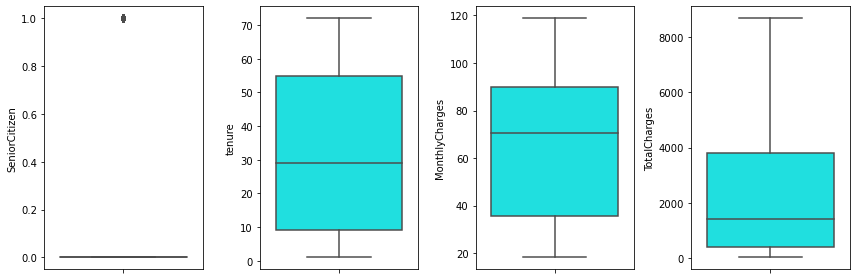

In [12]:
plt.figure(figsize=(12,4))

# plotting
features = numerical_data.columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

In [13]:
outlier = df['SeniorCitizen'].max()

df[df['SeniorCitizen'] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


Obervation: \
1.ada outlier pada kolom `SeniorCitizen` dengan nilai 1 n\
2.namun nilai pada outlier masih masuk akal dan tidak perlu dibersihkan

C:\Users\rifqi arman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rifqi arman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rifqi arman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

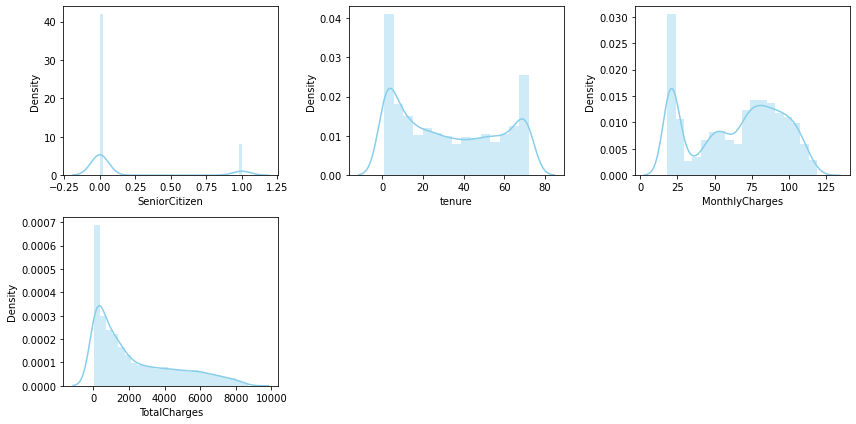

In [14]:
plt.figure(figsize=(12,6))

features = numerical_data.columns
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. kolom `tenure`, `monthly charges`,`total charges` tidak simetris sehingga nantinya kita perlu merubahnya untuk mendekati distribusi normal 
2. Dalam hal variabel target, `senior citizen = 0` lebih sering dalam kumpulan data. Tapi, kondisi ketidakseimbangan TIDAK parah sehingga masih bisa diterima

In [15]:
categoricals = categoricals.drop('customerID', axis=1)
#untuk memvisualisasikan data categorical perlu drp kolom custumerID

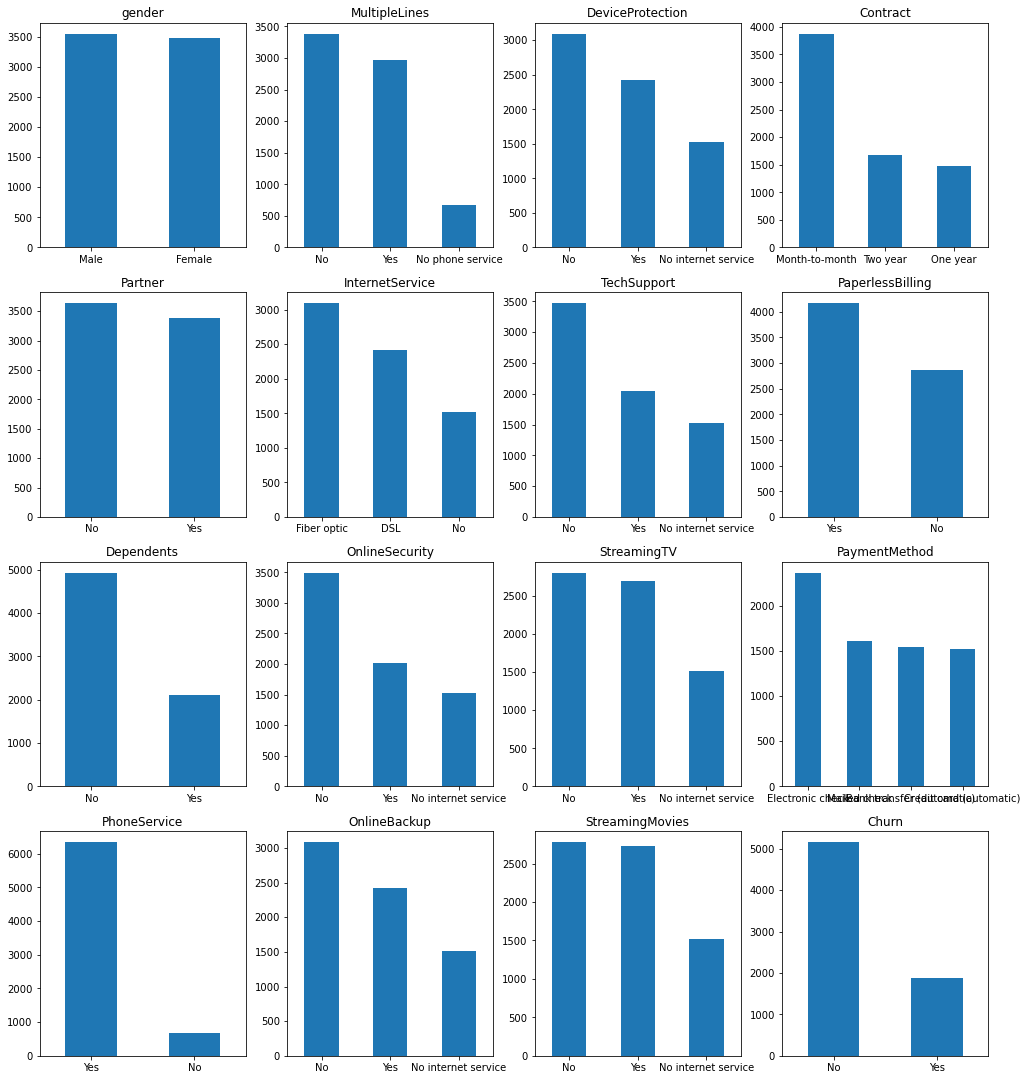

In [16]:
services = categoricals.columns 
fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (17,19))
for i, item in enumerate(services):
    if i < 4:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=4 and i < 8:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-4,1],rot = 0)
        
    elif i >=8 and i < 12:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-8,2],rot = 0)
        
    elif i < 16:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-12,3],rot = 0)
    ax.set_title(item)

# Bivariate Analysis

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:>

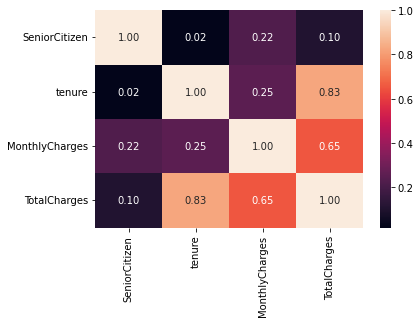

In [18]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

1. `tenure` dan `totalcharges` memiliki korelasi yang tinggi satu sama lain \
2.kita bisa memilih satu dari 2 itu untuk dilakukan modelling karena mereka redundan 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

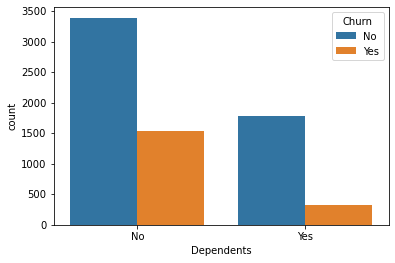

In [19]:

sns.countplot(data=df,
            x='Dependents',
            hue='Churn')

1.pelanggan yang tidak memiliki tanggungan lebih banyak yang melakukan churning daripada pelanggan yang memiliki tanggungan \
2.pelanggan yang tidak punya tanggungan juga lebih banyak yang tidak lakukan churning dibandingkan pelanggan yang memiliki tanggungan

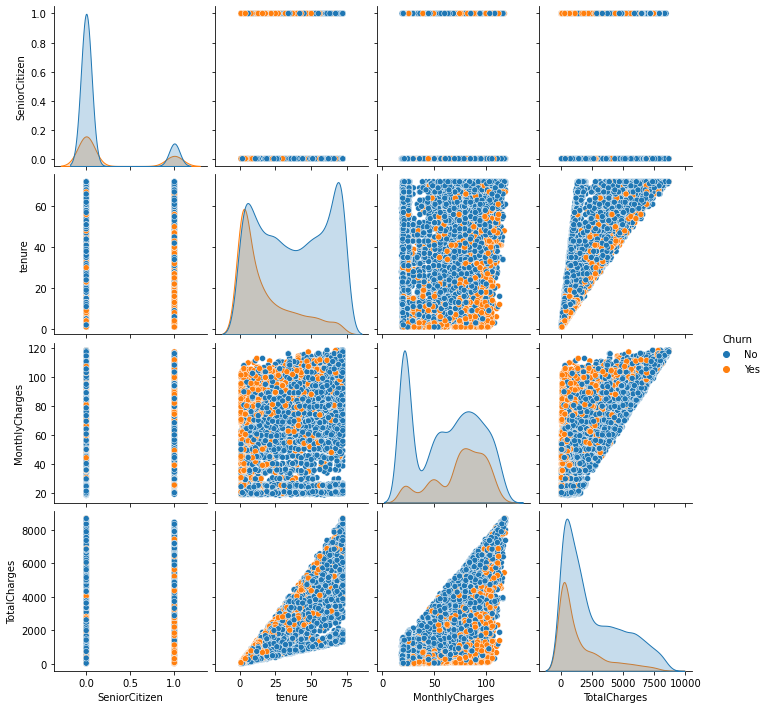

In [20]:
# pairplot of the data
sns.pairplot(df, hue='Churn')

# EDA Conclusion
1. data tidak terlalu memiliki masalah karna tidak mengandung missing value atau duplicate value hanya ada beberapa nilai yang kosong yang sudah berhasil di handle .
2. secara keseluruhan nilai minimum dan maximum masih masuk akal pada setiap kolomnya
3. pada umumnya data numerical penyebaran data nya tidak simetris.
4. dari boxplot dapat kita lihat bahwa ada outlier pada kolom `SeniorCitizen` dengan nilai 1 namun nilai pada outlier masih masuk akal dan tidak perlu dibersihkan
5. kolom `tenure`, `monthly charges`,`total charges` tidak simetris sehingga nantinya kita perlu merubahnya untuk mendekati distribusi normal
6. Dalam hal variabel target, `senior citizen = 0` lebih sering dalam kumpulan data. Tapi, kondisi ketidakseimbangan TIDAK parah sehingga masih bisa diterima
7. dari heatmap kolom `tenure` dan `totalcharges` memiliki korelasi yang tinggi satu sama lain kita bisa memilih satu dari 2 itu untuk dilakukan modelling karena mereka redundan
8. pada paiplot kita dapat melihat sebaran data numerical terhadap churning seperti pada tenure penyebaran pelanggan yang churning lebih banyak pada nilai tenure yang kecil.